<a href="https://colab.research.google.com/github/Biglasagna/Repo_test/blob/main/Projet_Diabete_UE_Bioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Proposition d'un modèle de deep learning pour la classification patients/contrôles pour le diabète de type 1 à partir de données phénotypiques.
---


Etapes du code :

* Présentation des données
* Visualisation des données
* Préparation des données
* Création du modèle et entrainement
* Visualisation de l'entrainement
* Test
* Visualisation des résultats

In [3]:
import os
import pandas as pd
import io

# Step 1: Set the working directory
# Replace 'your_directory_path' with the path to your folder
from google.colab import files
uploaded = files.upload()

#from google.colab import drive
#drive.mount('/content/drive')

#!cp /content/uploaded /content/drive/MyDrive/

# Replace 'your_file.txt' with the name of the uploaded file
file_name = next(iter(uploaded))  # Get the name of the uploaded file
data = pd.read_csv(io.BytesIO(uploaded[file_name]), sep='\t')  # Load the file
print(data.head())


Saving GSE81608_human_islets_rpkm.txt to GSE81608_human_islets_rpkm.txt
   gene.id  Sample_1  Sample_2  Sample_3  Sample_4  Sample_5  Sample_6  \
0        1   47.3396   24.0458    2.2743       0.0    0.0000       0.0   
1        2    0.0000    0.0000    0.0000       0.0    0.0000       0.0   
2        3    0.0000    0.0000    0.0000       0.0    0.0000       0.0   
3        9    0.0000    0.0000    0.0000       0.0  130.9796       0.0   
4       10    0.0000    0.0000    0.0000       0.0    0.0000       0.0   

   Sample_7  Sample_8  Sample_9  ...  Sample_1591  Sample_1592  Sample_1593  \
0       0.0     0.000       0.0  ...          0.0       0.3304       2.4857   
1       0.0     0.254       0.0  ...          0.0       0.0000       0.0000   
2       0.0     0.000       0.0  ...          0.0       0.0000       0.0000   
3       0.0     0.000       0.0  ...          0.0       0.0000       0.0000   
4       0.0     0.000       0.0  ...          0.0       0.0000       0.0000   

   Sampl

In [4]:
data_transposed = data.T  # Transpose the DataFrame

# Verify the transposed data
print(data_transposed.head())

            0      1      2      3      4      5        6      7        8      \
gene.id    1.0000    2.0    3.0    9.0   10.0   11.0  12.0000   13.0  14.0000   
Sample_1  47.3396    0.0    0.0    0.0    0.0    0.0   0.0000    0.0  31.2047   
Sample_2  24.0458    0.0    0.0    0.0    0.0    0.0  14.0425    0.0   0.0000   
Sample_3   2.2743    0.0    0.0    0.0    0.0    0.0   0.8412    0.0   7.8214   
Sample_4   0.0000    0.0    0.0    0.0    0.0    0.0   0.0000    0.0   0.0000   

          9      ...        39841         39842        39843        39844  \
gene.id    15.0  ...  101929766.0  1.019298e+08  101929768.0  101929769.0   
Sample_1    0.0  ...          0.0  5.198300e+00          0.0          0.0   
Sample_2    0.0  ...          0.0  1.064000e-01          0.0          0.0   
Sample_3    0.0  ...          0.0  3.188000e-01          0.0          0.0   
Sample_4    0.0  ...          0.0  0.000000e+00          0.0          0.0   

                39845        39846         39847  

In [5]:
data_transposed['Label'] = [0 if i < 653 else 1 for i in range(len(data_transposed))]

print(data_transposed.head())


                0    1    2    3     4     5        6     7        8     9  \
gene.id    1.0000  2.0  3.0  9.0  10.0  11.0  12.0000  13.0  14.0000  15.0   
Sample_1  47.3396  0.0  0.0  0.0   0.0   0.0   0.0000   0.0  31.2047   0.0   
Sample_2  24.0458  0.0  0.0  0.0   0.0   0.0  14.0425   0.0   0.0000   0.0   
Sample_3   2.2743  0.0  0.0  0.0   0.0   0.0   0.8412   0.0   7.8214   0.0   
Sample_4   0.0000  0.0  0.0  0.0   0.0   0.0   0.0000   0.0   0.0000   0.0   

          ...         39842        39843        39844        39845  \
gene.id   ...  1.019298e+08  101929768.0  101929769.0  101929770.0   
Sample_1  ...  5.198300e+00          0.0          0.0          0.0   
Sample_2  ...  1.064000e-01          0.0          0.0          0.0   
Sample_3  ...  3.188000e-01          0.0          0.0          0.0   
Sample_4  ...  0.000000e+00          0.0          0.0          0.0   

                39846         39847         39848         39849         39850  \
gene.id   101929771.0  1.0193

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Separate patients and controls
patients = data_transposed[data_transposed['Label'] == 1]  # Samples with label 1 (patients)
controls = data_transposed[data_transposed['Label'] == 0]  # Samples with label 0 (controls)

# Remove the 'Label' column for statistical testing
patients = patients.drop(columns=['Label'])
controls = controls.drop(columns=['Label'])

# Initialize a dictionary to store p-values
p_values = {}

# Perform t-test for each gene
for gene in patients.columns:
    t_stat, p_val = ttest_ind(patients[gene], controls[gene], nan_policy='omit')  # Handle NaN values if any
    p_values[gene] = p_val

# Convert p-values to a pandas Series for easier manipulation
p_values_series = pd.Series(p_values)

# Sort genes by p-value (ascending order)
sorted_p_values = p_values_series.sort_values()

# Select the top N genes with the smallest p-values (e.g., top 1000)
top_genes = sorted_p_values.head(1000).index  # Adjust the number as needed

# Filter the original dataset to keep only the top differentially expressed genes
filtered_data = data_transposed[top_genes]

# Add the 'Label' column back to the filtered dataset
filtered_data['Label'] = data_transposed['Label']


print(f"Filtered dataset shape: {filtered_data.shape}")

Filtered dataset shape: (1601, 1001)


<ipython-input-6-4ba9b019a78f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Label'] = data_transposed['Label']


In [7]:
filtered_data.head(5)

,1825,3254,1054,3294,3298,3283,3303,3270,1159,7810,...,5374,20,6277,5690,2445,7671,4184,1769,2194,Label
gene.id,2512.0000,4511.0000,1363.0000,4570.0000,4574.0000,4553.0000,4579.0000,4537.0000,1487.0000,10590.0000,...,7168.0000,27.0000,8702.0000,7586.0000,3290.0000,10425.0000,5704.0000,2314.0000,2965.0,0
Sample_1,2084.4688,0.0000,1146.0811,0.0000,1094.7389,0.0000,36.9193,218.3150,1.1258,1.6442,...,0.0000,0.0000,0.0000,30.9061,0.0000,14.7737,104.3926,0.0000,0.0,0
Sample_2,5063.4526,923.8252,860.5764,1284.9834,5913.7172,373.8557,1456.8013,1592.7667,3.6117,329.1361,...,5.1255,0.0000,0.0000,66.8071,1.4975,57.8217,2.4505,1.0308,0.0,0
Sample_3,25942.4924,659.7980,186.2947,942.9017,5883.5840,712.5448,1426.0149,2013.7186,3.4615,939.3310,...,7.0851,0.1111,0.0000,8.2016,0.0000,0.2839,0.0000,0.6175,0.0,0
Sample_4,9515.6617,288.0833,593.1930,455.8031,6200.0545,91.8527,420.1215,1190.6335,9.0289,842.4785,...,3.1966,0.0000,44.7742,58.2170,0.0000,15.3707,57.9478,0.0000,0.0,0


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your filtered dataset is in a pandas DataFrame called `filtered_data`
X = filtered_data.drop(columns=['Label']).values  # Features (1000 columns)
y = filtered_data['Label'].values  # Labels

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Initialize the model
input_size = X_train.shape[1]  # Number of features (1000)
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Binary classification
model = SimpleNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate on the validation set
with torch.no_grad():
    model.eval()
    y_pred = model(X_val)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_val).float().mean()
    print(f'Validation Accuracy: {accuracy.item() * 100:.2f}%')

Epoch [10/50], Loss: 0.5053
Epoch [20/50], Loss: 0.3605
Epoch [30/50], Loss: 0.2526
Epoch [40/50], Loss: 0.1738
Epoch [50/50], Loss: 0.1188
Validation Accuracy: 82.87%


Epoch [10/45], Loss: 0.4901, Val Loss: 0.5497, Val Accuracy: 73.21%
Epoch [20/45], Loss: 0.3501, Val Loss: 0.4705, Val Accuracy: 75.39%
Epoch [30/45], Loss: 0.2488, Val Loss: 0.4344, Val Accuracy: 77.88%
Epoch [40/45], Loss: 0.1723, Val Loss: 0.4159, Val Accuracy: 81.31%


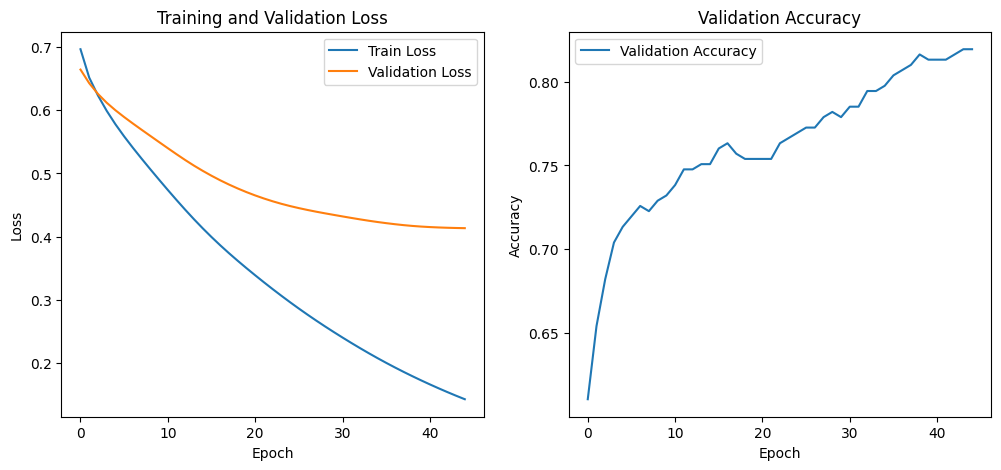

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your filtered dataset is in a pandas DataFrame called `filtered_data`
X = filtered_data.drop(columns=['Label']).values  # Features (1000 columns)
y = filtered_data['Label'].values  # Labels

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Initialize the model
input_size = X_train.shape[1]  # Number of features (1000)
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Binary classification
model = SimpleNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 45
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Evaluate on the validation set
    with torch.no_grad():
        model.eval()
        y_pred = model(X_val)
        val_loss = criterion(y_pred, y_val)
        val_losses.append(val_loss.item())

        y_pred_class = (y_pred > 0.5).float()
        accuracy = (y_pred_class == y_val).float().mean()
        val_accuracies.append(accuracy.item())

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {accuracy.item() * 100:.2f}%')

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()

In [29]:
# Sort features by importance (descending order)
sorted_indices = np.argsort(feature_importance)[::-1]  # Indices of features sorted by importance
sorted_feature_importance = feature_importance[sorted_indices]  # Sorted importance values
sorted_feature_names = feature_names[sorted_indices]  # Sorted feature names

# Select the top 50 features
top_n = 1000
top_feature_importance = sorted_feature_importance[:top_n]
top_feature_names = sorted_feature_names[:top_n]

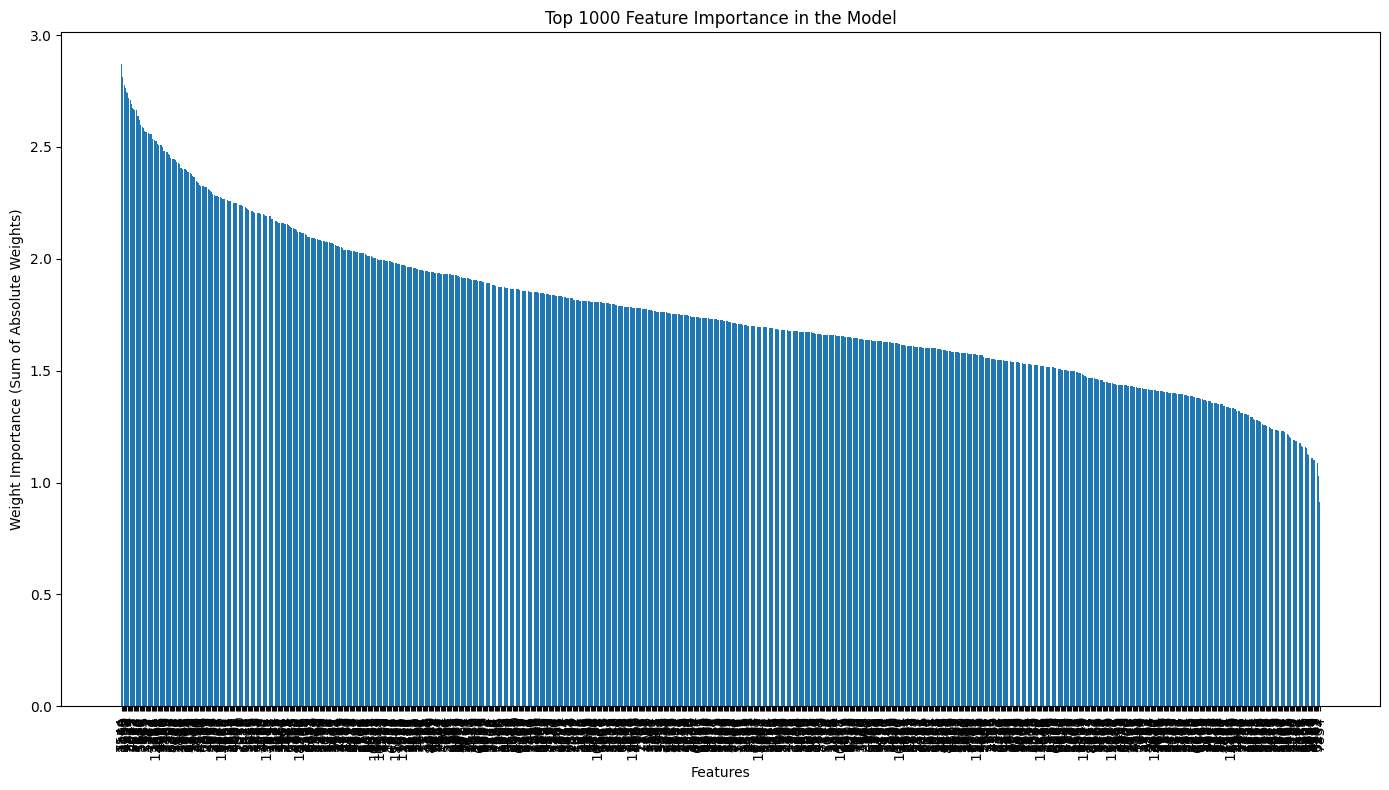

In [30]:
import matplotlib.pyplot as plt

# Plot the top 50 features
plt.figure(figsize=(14, 8))
plt.bar(range(top_n), top_feature_importance, align='center')
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Weight Importance (Sum of Absolute Weights)')
plt.title(f'Top {top_n} Feature Importance in the Model')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
